# 🛒 Retail Sales Insights

Exploratory Data Analysis (EDA) using the Superstore dataset.

## 📦 Load Dataset

In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv('C:/0_Proyectos/PortfolioDS/RetailSales/data/superstore.csv', encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## 📊 Basic Overview

In [5]:
# Basic info
df.info()
# Summary statistics
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,1237,1334,4,793,793,3,1,531,49,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,9/5/2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,38,35,5968,37,37,5191,9994,915,2001,NaN,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,2885.163629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


## 🔎 Missing Values

In [6]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

## 📈 Key Metrics

In [7]:
# Key performance indicators
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
num_orders = df['Order ID'].nunique()
num_customers = df['Customer ID'].nunique()

print(f'Total Sales: ${total_sales:,.2f}')
print(f'Total Profit: ${total_profit:,.2f}')
print(f'Total Orders: {num_orders}')
print(f'Unique Customers: {num_customers}')

Total Sales: $2,297,200.86
Total Profit: $286,397.02
Total Orders: 5009
Unique Customers: 793


## 📊 Sales by Category

c:\0_Proyectos\PortfolioDS\RetailSales\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


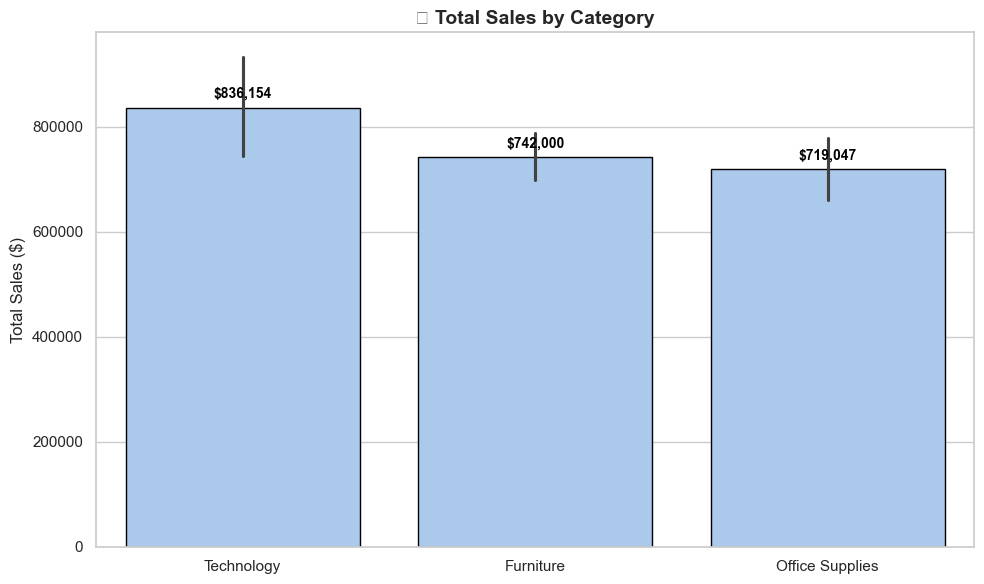

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo más profesional
sns.set(style="whitegrid", palette="pastel")

# Ordenar categorías por ventas totales
order = df.groupby("Category")["Sales"].sum().sort_values(ascending=False).index

plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=df,
    x="Category",
    y="Sales",
    estimator=sum,
    order=order,
    edgecolor='black'
)

# Añadir valores encima de las barras
for p in ax.patches:
    value = p.get_height()
    ax.annotate(f"${value:,.0f}", 
                (p.get_x() + p.get_width() / 2., value),
                ha='center', va='bottom',
                fontsize=10, fontweight='bold',
                color='black', xytext=(0, 5),
                textcoords='offset points')

# Títulos y etiquetas
plt.title("💼 Total Sales by Category", fontsize=14, weight='bold')
plt.ylabel("Total Sales ($)", fontsize=12)
plt.xlabel("")
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


## 🌍 Sales by Region

<positron-console-cell-10>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



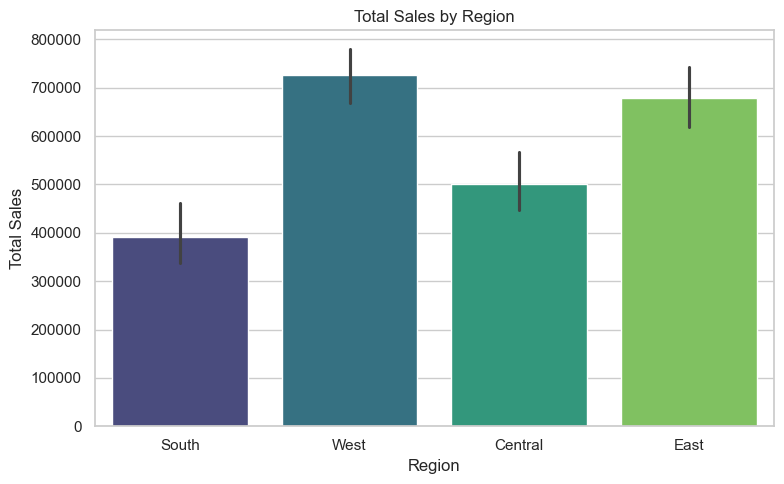

In [10]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Region', y='Sales', estimator=sum, palette='viridis')
plt.title('Total Sales by Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 🧩 Sales by Segment

<positron-console-cell-11>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



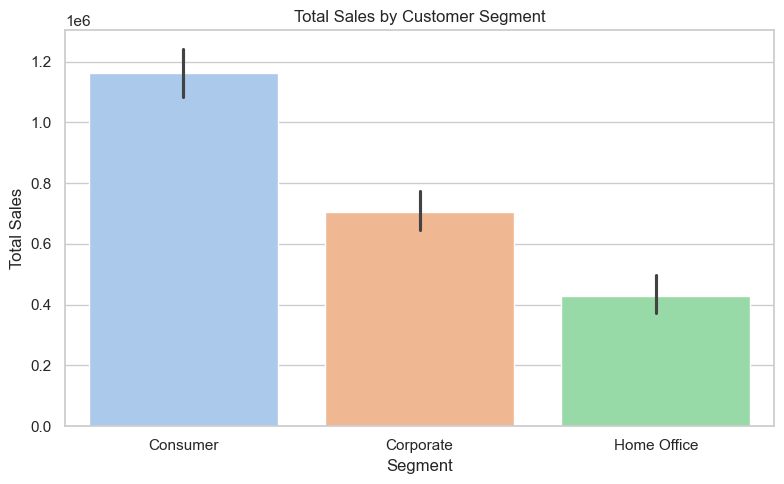

In [11]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Segment', y='Sales', estimator=sum, palette='pastel')
plt.title('Total Sales by Customer Segment')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 📅 Sales Over Time

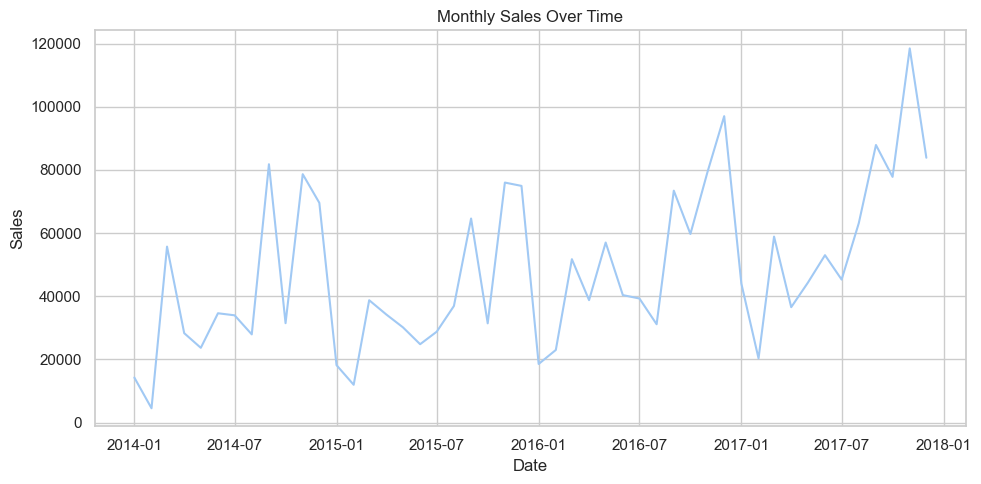

In [12]:
# Convert Order Date to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
# Group by month
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M')).agg({'Sales': 'sum'}).reset_index()
monthly_sales['Order Date'] = monthly_sales['Order Date'].dt.to_timestamp()

# Plot
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_sales, x='Order Date', y='Sales')
plt.title('Monthly Sales Over Time')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

## 💰 Profit Analysis by Category

<positron-console-cell-13>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



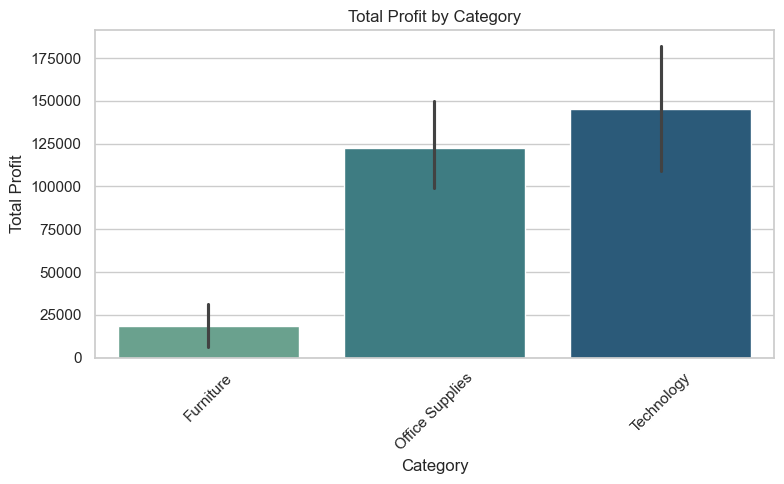

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Category', y='Profit', estimator=sum, palette='crest')
plt.title('Total Profit by Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 📦 Sales and Profit by Sub-Category

<positron-console-cell-14>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


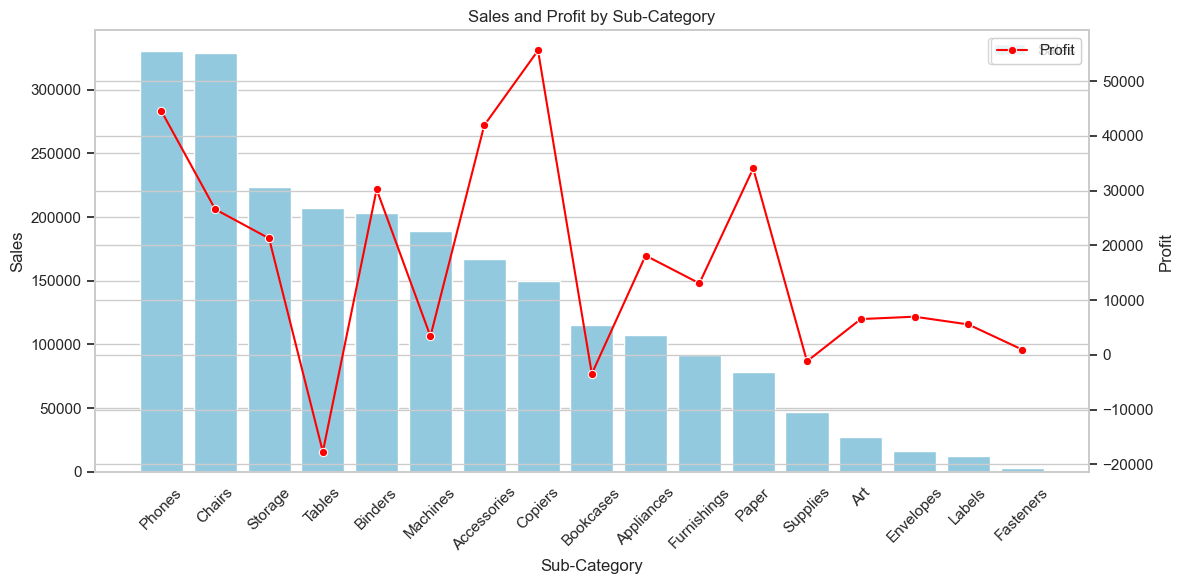

In [14]:
# Sort sub-categories by total sales
sales_profit = df.groupby('Sub-Category').agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values(by='Sales', ascending=False).reset_index()

# Plot
fig, ax1 = plt.subplots(figsize=(12,6))
sns.barplot(data=sales_profit, x='Sub-Category', y='Sales', ax=ax1, color='skyblue', label='Sales')
ax2 = ax1.twinx()
sns.lineplot(data=sales_profit, x='Sub-Category', y='Profit', ax=ax2, color='red', marker='o', label='Profit')
ax1.set_title('Sales and Profit by Sub-Category')
ax1.set_ylabel('Sales')
ax2.set_ylabel('Profit')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
fig.tight_layout()
plt.show()